## Pycaret

In [ ]:
!pip install pycaret

In [ ]:
### Restart runtime

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/titanic2.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


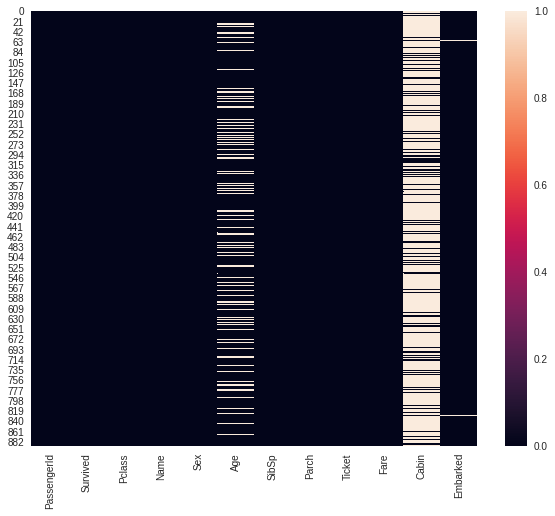

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull());

In [ ]:
# Drop all rows with missin data
data = data.dropna()

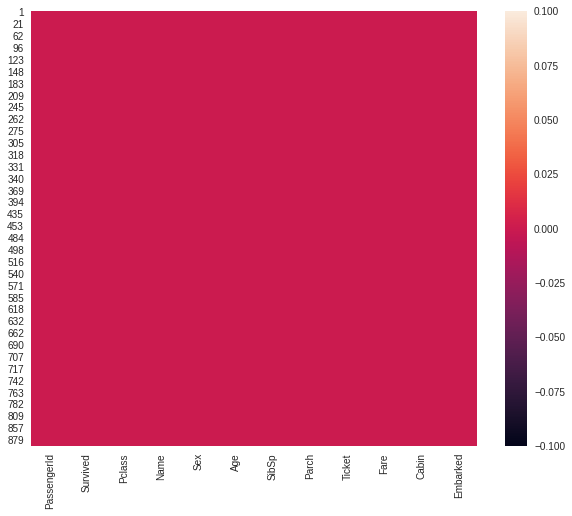

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull());

In [ ]:
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True) 

gender_mapper = {'male': 0, 'female': 1} 

data['Sex'].replace(gender_mapper, inplace=True) 

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0]) 
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']] 

data = data.rename(columns={'Title': 'Title_Unusual'}) 
data.drop('Name', axis=1, inplace=True) 
data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']] 
data.drop('Cabin', axis=1, inplace=True) 
emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked') 
data = pd.concat([data, emb_dummies], axis=1) 

data.drop('Embarked', axis=1, inplace=True) 

# To replace missing values with interpolated values, for example Age
data['Age'] = data['Age'].interpolate()

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
6,0,1,0,54.0,0,0,51.8625,0,1,0,1
10,1,3,1,4.0,1,1,16.7000,0,1,0,1
11,1,1,1,58.0,0,0,26.5500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,0,1,0,1
872,0,1,0,33.0,0,0,5.0000,0,1,0,1
879,1,1,1,56.0,0,1,83.1583,0,1,0,0
887,1,1,1,19.0,0,0,30.0000,0,1,0,1


In [ ]:
from pycaret.classification import * 
clf = setup(data, target='Survived', session_id=667)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,667
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(183, 11)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.749400,0.808100,0.755600,0.860600,0.796800,0.469100
1,Ridge Classifier,0.726300,0.000000,0.755600,0.834200,0.782300,0.406300
2,Random Forest Classifier,0.725600,0.768700,0.812500,0.789900,0.793800,0.365100
3,Logistic Regression,0.719200,0.811200,0.791700,0.801700,0.787200,0.360100
4,Gradient Boosting Classifier,0.716700,0.773700,0.801400,0.785100,0.788600,0.348400
5,Light Gradient Boosting Machine,0.701900,0.738100,0.765300,0.795300,0.770000,0.332500
6,Naive Bayes,0.687200,0.714300,0.908300,0.716900,0.793600,0.142800
7,CatBoost Classifier,0.685300,0.763600,0.801400,0.751800,0.770000,0.264700
8,Extreme Gradient Boosting,0.677600,0.749700,0.777800,0.759100,0.761700,0.253600
9,Ada Boost Classifier,0.670500,0.750300,0.812500,0.730000,0.764800,0.210600


In [ ]:
#It seems like Light Gradient Boosting approach did the best overall, so we can use it to create our model:

In [ ]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6923,0.6944,0.7778,0.7778,0.7778,0.2778
1,0.6923,0.7222,0.7778,0.7778,0.7778,0.2778
2,0.6923,0.7222,0.8889,0.7273,0.8000,0.1613
3,0.6923,0.7778,0.6667,0.8571,0.7500,0.3659
4,0.7692,0.8889,0.6667,1.0000,0.8000,0.5517
5,0.8462,0.9722,1.0000,0.8182,0.9000,0.5806
6,0.7692,0.7500,0.8750,0.7778,0.8235,0.4935
7,0.6154,0.7125,0.7500,0.6667,0.7059,0.1558
8,0.6667,0.5625,0.7500,0.7500,0.7500,0.2500
9,0.5833,0.5781,0.5000,0.8000,0.6154,0.2105


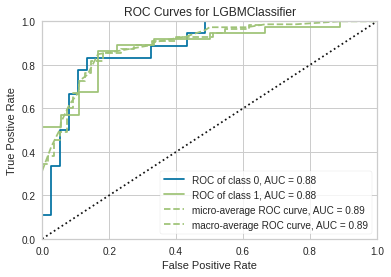

In [ ]:
plot_model(model)

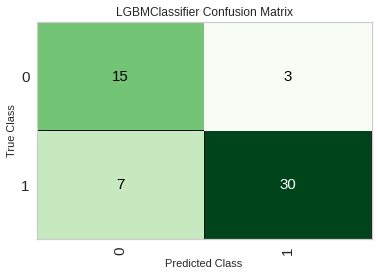

In [ ]:
plot_model(model, 'confusion_matrix')

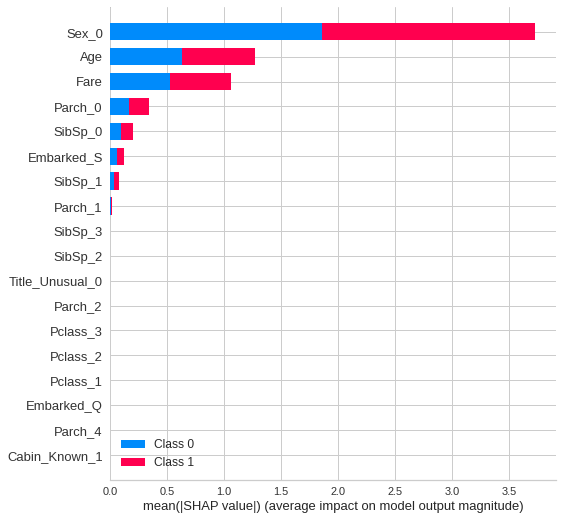

In [ ]:
interpret_model(model)

In [ ]:
# SHAP, or SHapley Additive exPlanations, is a way to explain the outputs of a machine learning model. 
# We can use it to see which features are most important by 
# plotting the SHAP values of every feature for every sample.

In [ ]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.8182,0.8829,0.8108,0.9091,0.8571,0.6094


In [ ]:
finalize_model(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=667, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
save_model(model, 'titanic_lgbm') #pkl

Transformation Pipeline and Model Succesfully Saved


## Diabets Dataset

In [47]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
#The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). 
#The module used in this example is pycaret.classification.

In [49]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7322
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


All the preprocessing steps are applied within setup(). With over 20 features to prepare data for machine learning, PyCaret creates a transformation pipeline based on the parameters defined in setup function. It automatically orchestrates all dependencies in a pipeline so that you don’t have to manually manage the sequential execution of transformations on test or unseen dataset

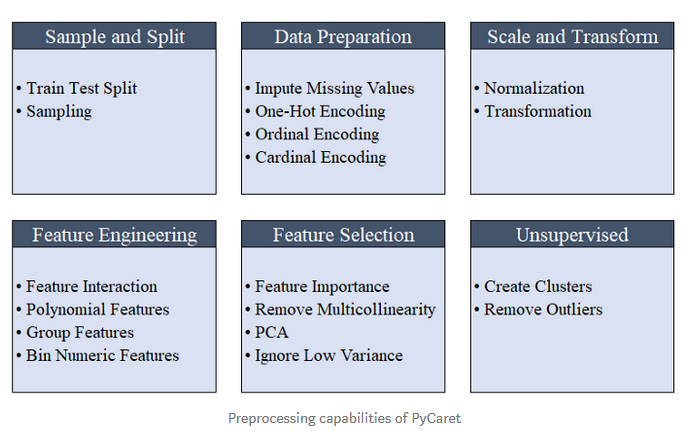

In [50]:
from IPython.display import Image
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/pycaret1.PNG')

k-fold cross validation (by default 10 folds). The evaluation metrics used are:

    * For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa
    * For Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

In [51]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.767100,0.000000,0.555800,0.712700,0.618600,0.456600
1,Linear Discriminant Analysis,0.761600,0.817100,0.555800,0.697500,0.612900,0.445700
2,Logistic Regression,0.754300,0.808100,0.572200,0.674900,0.614100,0.437100
3,Ada Boost Classifier,0.750500,0.781200,0.587400,0.664300,0.618400,0.435100
4,Extreme Gradient Boosting,0.750500,0.814900,0.614000,0.649400,0.628000,0.441100
5,Random Forest Classifier,0.748500,0.786000,0.491500,0.712000,0.577300,0.406200
6,Gradient Boosting Classifier,0.743100,0.812500,0.561100,0.663800,0.600500,0.414400
7,CatBoost Classifier,0.741300,0.810800,0.577200,0.649100,0.605500,0.415100
8,Extra Trees Classifier,0.728300,0.778900,0.471100,0.658100,0.542100,0.359000
9,Light Gradient Boosting Machine,0.720800,0.787300,0.561400,0.610700,0.580500,0.373000


In [52]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7037,0.7128,0.5789,0.5789,0.5789,0.3504
1,0.7593,0.8737,0.5263,0.7143,0.6061,0.4384
2,0.7037,0.7158,0.6842,0.5652,0.6190,0.3802
3,0.7963,0.8602,0.6842,0.7222,0.7027,0.5479
4,0.7407,0.7820,0.6316,0.6316,0.6316,0.4316
5,0.7593,0.6767,0.5789,0.6875,0.6286,0.4524
6,0.7593,0.8120,0.5789,0.6875,0.6286,0.4524
7,0.6604,0.6984,0.3333,0.5000,0.4000,0.1762
8,0.8113,0.7746,0.7222,0.7222,0.7222,0.5794
9,0.8113,0.9063,0.5556,0.8333,0.6667,0.5423


In [53]:
tuned_adaboost = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7037,0.8241,0.4737,0.6000,0.5294,0.3175
1,0.7778,0.8932,0.6316,0.7059,0.6667,0.5008
2,0.7963,0.8827,0.7368,0.7000,0.7179,0.5587
3,0.7778,0.8165,0.6316,0.7059,0.6667,0.5008
4,0.6852,0.7759,0.5263,0.5556,0.5405,0.3014
5,0.7407,0.7286,0.5789,0.6471,0.6111,0.4176
6,0.7778,0.8391,0.5789,0.7333,0.6471,0.4882
7,0.6981,0.7405,0.3889,0.5833,0.4667,0.2677
8,0.8302,0.8246,0.7222,0.7647,0.7429,0.6163
9,0.8113,0.8889,0.5556,0.8333,0.6667,0.5423


In [54]:
# creating a decision tree model
dt = create_model('dt')# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.7992,0.4737,0.6429,0.5455,0.3520
1,0.7593,0.8541,0.4211,0.8000,0.5517,0.4081
2,0.8148,0.7842,0.6316,0.8000,0.7059,0.5735
3,0.7593,0.8496,0.5263,0.7143,0.6061,0.4384
4,0.7037,0.7692,0.4737,0.6000,0.5294,0.3175
5,0.7778,0.7150,0.4737,0.8182,0.6000,0.4609
6,0.6667,0.7880,0.4211,0.5333,0.4706,0.2322
7,0.6604,0.7397,0.3889,0.5000,0.4375,0.1997
8,0.7925,0.8484,0.5556,0.7692,0.6452,0.5038
9,0.7547,0.8357,0.5000,0.6923,0.5806,0.4136


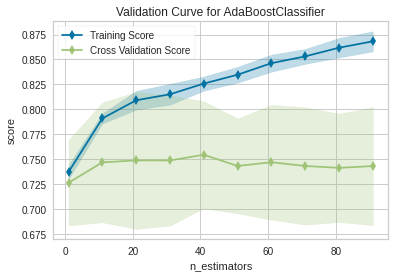

In [55]:
# create a model
adaboost = create_model('ada')# AUC plot
plot_model(adaboost, plot = 'auc')# Decision Boundary
plot_model(adaboost, plot = 'boundary')# Precision Recall Curve
plot_model(adaboost, plot = 'pr')# Validation Curve
plot_model(adaboost, plot = 'vc')

In [56]:
evaluate_model(adaboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.8541,0.6316,0.6667,0.6486,0.4658
1,0.7778,0.8722,0.5789,0.7333,0.6471,0.4882
2,0.7963,0.8436,0.8421,0.6667,0.7442,0.5787
3,0.7593,0.8361,0.6316,0.6667,0.6486,0.4658
4,0.6667,0.7669,0.5263,0.5263,0.5263,0.2692
5,0.7222,0.7218,0.6316,0.6000,0.6154,0.3982
6,0.7778,0.8165,0.6316,0.7059,0.6667,0.5008
7,0.6792,0.7302,0.3889,0.5385,0.4516,0.2332
8,0.8302,0.8476,0.7222,0.7647,0.7429,0.6163
9,0.7358,0.8603,0.5556,0.6250,0.5882,0.3948


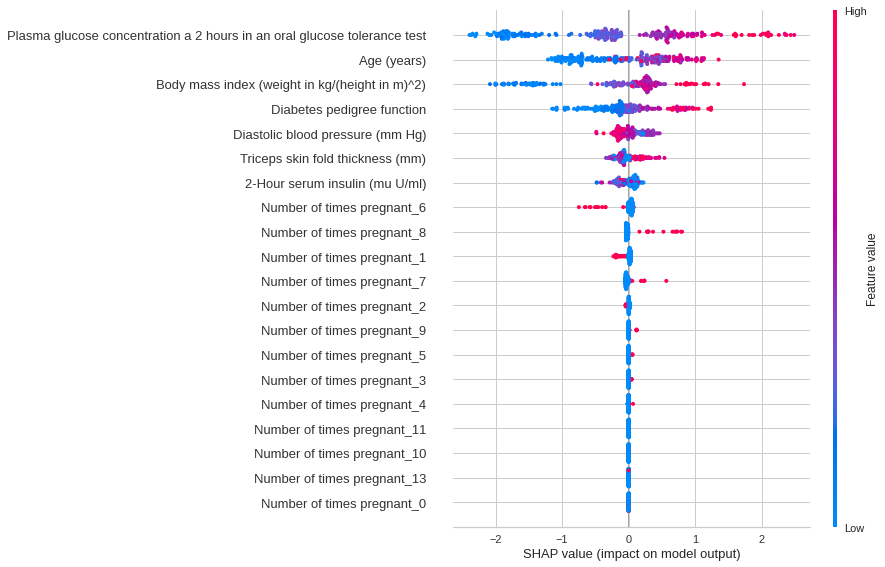

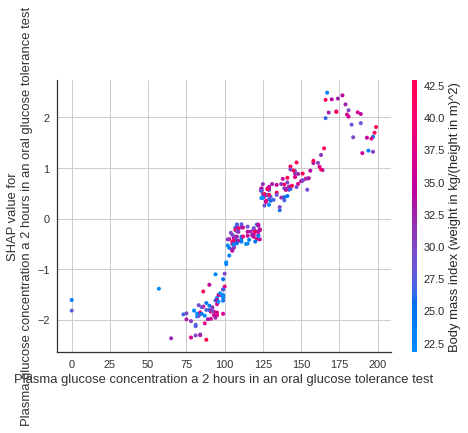

In [57]:
# create a model
xgboost = create_model('xgboost')# summary plot
interpret_model(xgboost)# correlation plot
interpret_model(xgboost, plot = 'correlation')

In [58]:
interpret_model(xgboost, plot = 'reason', observation = 0) 

In [59]:
# create a model
rf = create_model('rf')# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.7749,0.8134,0.5926,0.7164,0.6486,0.4852


In [60]:
predictions = predict_model(rf, data = diabetes)

In [63]:
# creating model
adaboost = create_model('ada')# saving model
save_model(adaboost, model_name = 'ada_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7037,0.7128,0.5789,0.5789,0.5789,0.3504
1,0.7593,0.8737,0.5263,0.7143,0.6061,0.4384
2,0.7037,0.7158,0.6842,0.5652,0.6190,0.3802
3,0.7963,0.8602,0.6842,0.7222,0.7027,0.5479
4,0.7407,0.7820,0.6316,0.6316,0.6316,0.4316
5,0.7593,0.6767,0.5789,0.6875,0.6286,0.4524
6,0.7593,0.8120,0.5789,0.6875,0.6286,0.4524
7,0.6604,0.6984,0.3333,0.5000,0.4000,0.1762
8,0.8113,0.7746,0.7222,0.7222,0.7222,0.5794
9,0.8113,0.9063,0.5556,0.8333,0.6667,0.5423


Transformation Pipeline and Model Succesfully Saved


In [64]:
save_experiment(experiment_name = 'my_first_experiment')

Experiment Succesfully Saved
